RangeIndex(start=0, stop=7043, step=1)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streaming

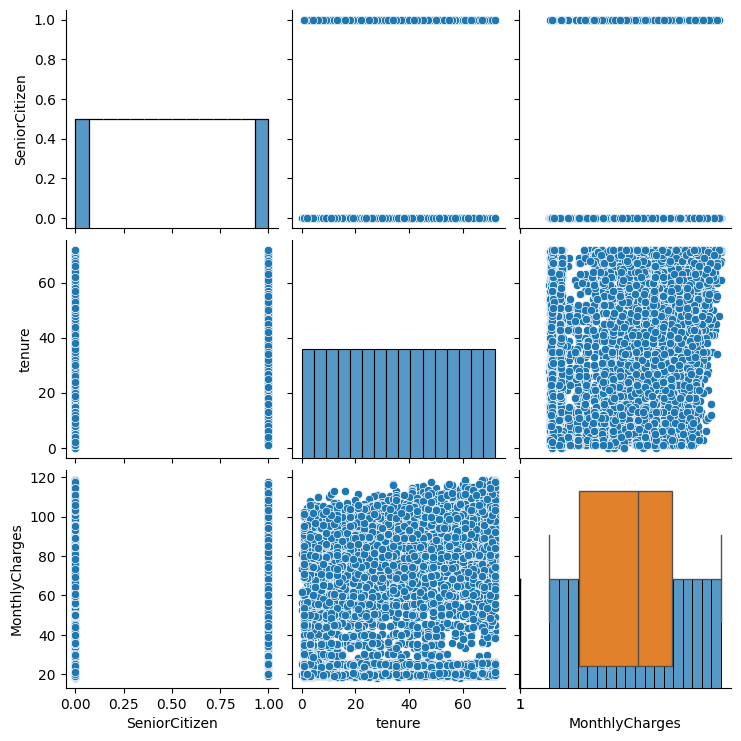

   MonthlyCharges  TotalCharges
0        0.115423      0.001275
1        0.385075      0.215867
2        0.354229      0.010310
3        0.239303      0.210241
4        0.521891      0.015330
Training set size: (5634, 22)
Testing set size: (1409, 22)


C:\Users\AYUSHI CHOUGULE\AppData\Local\Temp\ipykernel_28184\1691136772.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Telecom_Customer_Churn.csv")
print(df.index)
print(df.head())
print(df.tail())
print(df)
print(df.columns)
df.shape
df.nunique()

df.isnull().sum()

print("Numbers of rows before removing duplicates: ",len(df))
df_cleaned=df.drop_duplicates()
print("Numbers of rows after removing duplicates: ",len(df))
df.describe()

unique,counts=np.unique(df["tenure"],return_counts=True)
print(unique,counts)
unique,counts=np.unique(df["MonthlyCharges"],return_counts=True)
print(unique,counts)

sns.pairplot(df)

plt.boxplot(df["tenure"])

plt.boxplot(df["MonthlyCharges"])

# Check for inconsistent categorical data
print(df['Contract'].unique())
print(df['PaymentMethod'].unique())
# Example: Standardize values in categorical columns (if needed)
#df['PaymentMethod'] = df['PaymentMethod'].replace({'electronic check': 'Electronic Check', 'credit card (automatic)': 'Credit Card'})

df.info()

import seaborn as sns
import matplotlib.pyplot as plt
# Visualize outliers in numerical columns
sns.boxplot(x=df['MonthlyCharges'])
plt.show()
# Handling outliers (Example: capping values)
q1 = df['MonthlyCharges'].quantile(0.25)
q3 = df['MonthlyCharges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Capping outliers
df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower=lower_bound, upper=upper_bound)

#feature engineering
# Create a new feature 'tenure_group'
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5-6 years'])
# Create interaction features if necessary (example)
df['MonthlyCharges_Tenure'] = df['MonthlyCharges'] * df['tenure']

df.head()

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
scaler = MinMaxScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])
print(df[['MonthlyCharges', 'TotalCharges']].head())

#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Select features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

X_train.shape

y_train.shape

X_test.shape

y_test.shape

# Save the cleaned dataset to a CSV file
df.to_csv('Telecom_Customer_Churn_Cleaned.csv', index=False)


